In [1]:
%cd ..

/home/atanu/Documents/swatah/edgeyolo


In [2]:
# ! pip install onnxruntime

In [3]:
import cv2
import onnxruntime as ort
import matplotlib.pyplot as plt
%matplotlib inline

from utils.process import preprocessing, postprocessing

IMAGE_PATH = "data/images/03.png"
ONNX_MODEL_PATH = "models/pfd_tiny_lrelu.onnx"
CLASS_NAMES = ["BG", "Forklift", "Palete"]
COLORS = ["red", "yellow", "white"]
IMAGE_SHAPE = (640, 640)

In [4]:
session = ort.InferenceSession(ONNX_MODEL_PATH)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

tensor_input shape: (1, 3, 640, 640)
predictions shape: (1, 8400, 8)


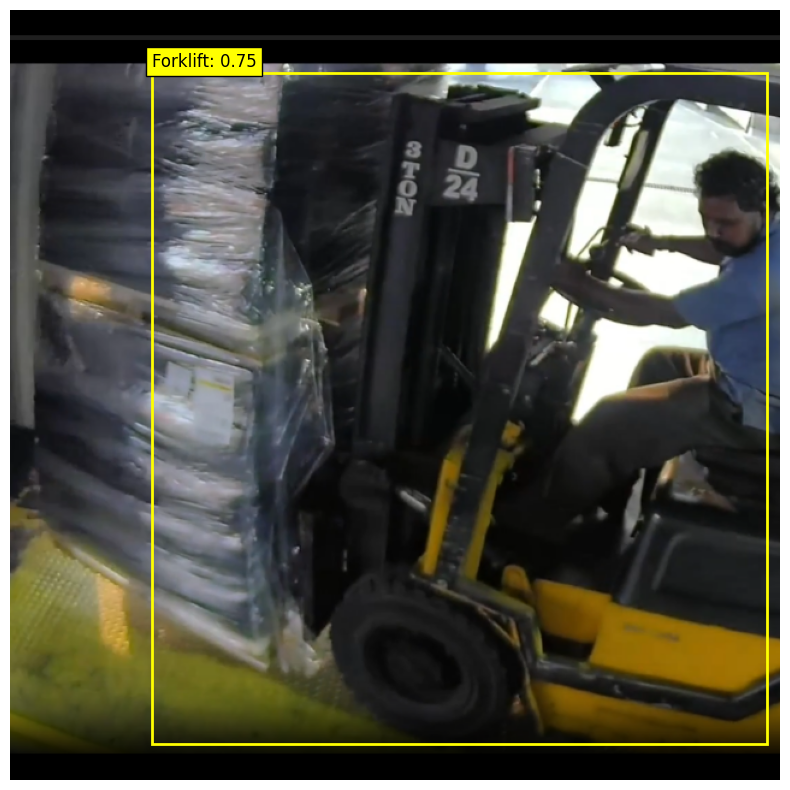

In [5]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# preprocessing
tensor_input, image, ratios = preprocessing(image, IMAGE_SHAPE)
print(f"tensor_input shape: {tensor_input.shape}")

# predictions
predictions = session.run([output_name], {input_name: tensor_input})
print(f"predictions shape: {predictions[0].shape}")

# postprocessing
outputs = postprocessing(predictions[0], ratios)

plt.figure(figsize=(10, 10))
plt.imshow(image)

for detections in outputs:

    if detections.ndim == 1:
        detections = detections.reshape(1, -1)

    for det in detections:
        x1, y1, x2, y2 = det[:4]
        class_id = int(det[8])
        score = det[4] * det[5 + class_id]
        label = f"{CLASS_NAMES[class_id]}: {score:.2f}"

        plt.gca().add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                fill=False,
                edgecolor=COLORS[class_id],
                linewidth=2,
            )
        )
        plt.text(
            x1,
            y1 - 5,
            label,
            fontsize=12,
            bbox=dict(facecolor=COLORS[class_id], alpha=1),
        )

plt.axis("off")
plt.show()